In [1]:
clear all

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import io
import scipy.io as sio
%matplotlib inline 
import pylab
import csv
from Tkinter import Tk
from tkFileDialog import askopenfilename
from tkFileDialog import askdirectory
import nibabel as nb
from scipy import io
import nibabel as nb
from scipy.interpolate import interp1d
from scipy import ndimage

# Open data

In [3]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie2/100148/100148ss2it30/100148Final/100148ss2onc500regcdFF40sMpsfkfint300Smith0_4_60TS.mat


In [4]:
Ua=sio.loadmat(filename)
DT=Ua['TSo']
DT.shape

(11603, 300)

In [5]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename2 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename2)

/media/sophie2/100148/100148ss2it30/100148Final/100148ss2onc500regcdFF40sMpsfkfint300Smith0_4_60IC.nii


In [6]:
img1 = nb.load(filename2)
data = img1.get_data()
S=data.shape
S

(181, 109, 9, 300)

In [7]:
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/home/sophie/Desktop/100148ss2TimeFluoOn.mat


In [8]:
Ua=sio.loadmat(filename)
Time_fluo=Ua['TimeFluoOn']
Time_fluo.shape

(1, 6346)

In [9]:
Time_fluoICA=Time_fluo[:,501:6346]

In [10]:
Time_fluoICA.shape

(1, 5845)

In [11]:
Time_fluoICA=np.array(range(11603))*0.01

Z-score

In [12]:
Demean=np.zeros(S)
Dmaps=np.zeros(S)
Dvar=np.zeros(S)
Var=np.zeros(S[3])
D2=np.zeros([S[0],S[1],5,S[3]])
Tvar=np.zeros(S[3])

In [13]:
for i in range(S[3]):
    Demean[:,:,:,i]=data[:,:,:,i]-np.mean(np.mean(np.mean(data[:,:,:,i],0),0),0)

In [14]:
for i in range(S[3]):
    Dsq=np.reshape(Demean[:,:,:,i],S[0]*S[1]*S[2])
    Var[i]=np.sqrt(np.var(Dsq))
    Dvar=Demean[:,:,:,i]/Var[i]
    Dmaps[:,:,:,i]=Dvar-2.5
    Tvar[i]=np.var(DT[i,:])
Dmaps[Dmaps<0]=0

In [15]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie2/100148/100148ss2it30/100148Final/100148Xk.mat


In [16]:
Ua=sio.loadmat(filename)
Xk=Ua['Xk']

In [17]:
Xk.shape

(11603, 8)

# Open Masks

In [18]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenameM = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenameM)
img1 = nb.load(filenameM)
Masks = img1.get_data()
Sm=Masks.shape
Masks=np.array(Masks)

/media/sophie2/100148/100148ss2it30/100148ForNotebook/100148JFRCTransformedGoodfullpsftrimmed.nii


In [19]:
filenameM='/home/sophie/Downloads/RegionList'
with open(filenameM) as f:
    content = f.readlines()
Names=[Line.split('\t') for Line in content]
RegionName=[Names[i][0] for i in range(75)]
Num=[int(Names[i][2]) for i in range(75)]

# Average in masks to sort components by brain region

In [20]:
Dmaps.shape

(181, 109, 9, 300)

In [21]:
M=np.zeros((S[3],86))
Mapmean=np.zeros(S[3])
MMasks=np.zeros(86)

In [22]:
for i in range(S[3]):
    Mapmean[i]=np.mean(np.mean(np.mean(Dmaps[:,:,:,i])))
    for j in range(86):
        MMasks[j]=np.mean(np.mean(np.mean(Masks[:,:,:,j])))
        if MMasks[j]:
            M[i,j]=np.mean(np.mean(np.mean(Masks[:,:,:,j]*Dmaps[:,:,:,i])))/(MMasks[j]*Mapmean[i])

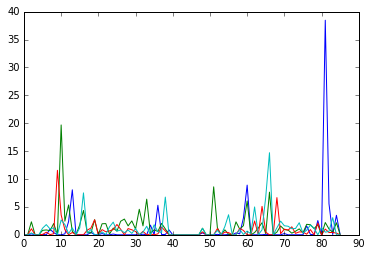

In [29]:
plt.plot(M[1,:])
plt.plot(M[100,:])
plt.plot(M[200,:])
plt.plot(M[298,:])

In [35]:
J=[l for l in range(75) if Num[l]==I]

In [36]:
J

[74]

In [37]:
CompMainName=S[3]*['']
CompNameAdd=np.zeros((S[3],86))
for i in range(S[3]):
    Max=np.max(M[i,:])
    I=np.argmax(M[i,:])+1
    for j in range(86):
        J=[l for l in range(74) if Num[l]==(j+1)]
        if M[i,j]>0.2*Max:
            CompNameAdd[i,J]=1
    J=[l for l in range(75) if Num[l]==I]
    CompMainName[i]=Names[np.array(J)][0]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [38]:
Time_fluoICA.shape

(11603,)

In [39]:
DT.shape

(11603, 300)

LO_R
LOP_R
19
LO_R
LOP_R
PLP_R
40
LO_R
LOP_R
46
LO_R
53
LO_R
ME_R
55
LO_R
ME_R
68
LO_R
ME_R
69
LO_R
LOP_R
ME_R
74
LO_R
ME_R
76
LO_R
LOP_R
ME_R
79
LO_R
ME_R
82
LO_R
LOP_R
ME_R
98
LO_R
LOP_R
ME_R
101
LO_R
ME_R
144
LO_R
ME_R
157
LO_R
ME_R
204
LO_R
ME_R
230
lobula


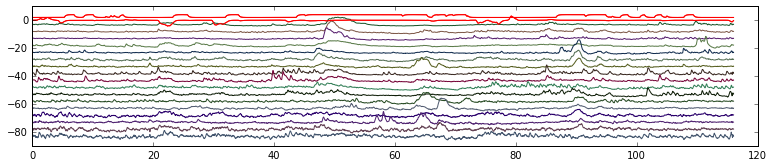

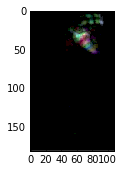

BU_R
ME_L
211
bulb


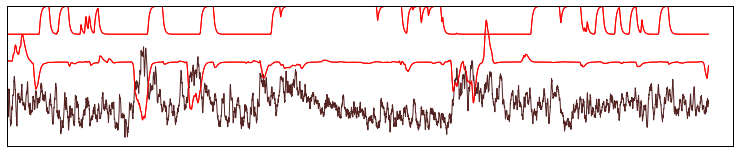

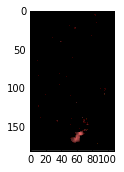

PB
0
PB
ATL_R
2
PB
9
PB
11
PB
IPS_R
140
protocerebral bridge


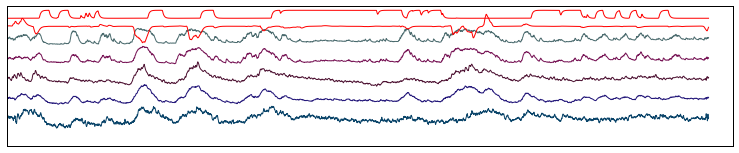

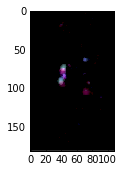

LH_R
AL_R
PLP_R
MB_CA_R
114
lateral horn


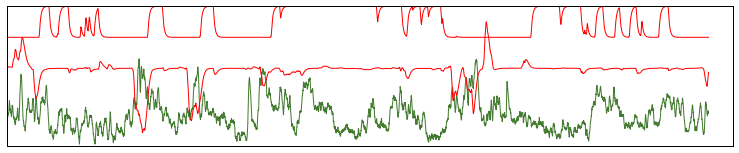

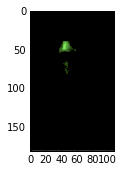

SAD
AMMC_R
GNG
3
saddle


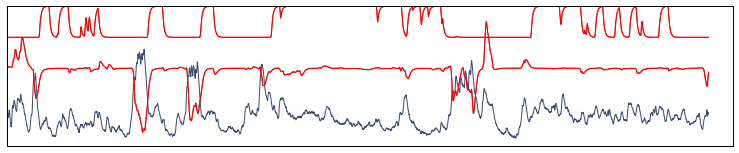

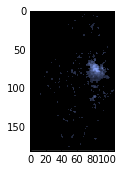

CAN_R
IPS_R
106
PB
CAN_R
CAN_L
ME_L
284
cantle


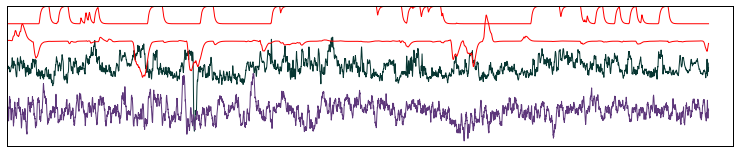

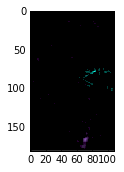

MB_VL_R
MB_ML_R
57
MB_PED_R
MB_VL_R
MB_ML_R
SIP_R
125
medial lobe of adult mushroom body


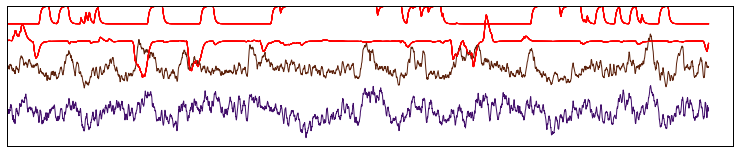

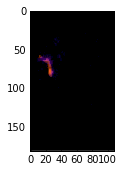

LO_R
LOP_R
ME_R
87
LO_R
LOP_R
ME_R
99
LOP_R
ME_R
121
LO_R
LOP_R
ME_R
131
LOP_R
ME_R
188
LO_R
LOP_R
ME_R
EPA_R
220
LO_R
LOP_R
ME_R
225
LO_R
LOP_R
ME_R
272
lobula plate


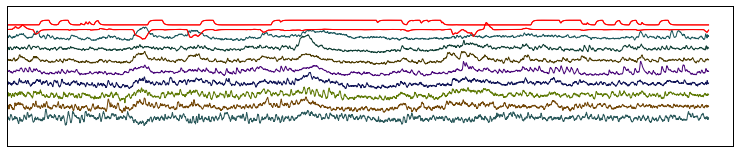

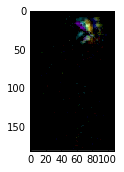

EB
FB
94
EB
195
ellipsoid body


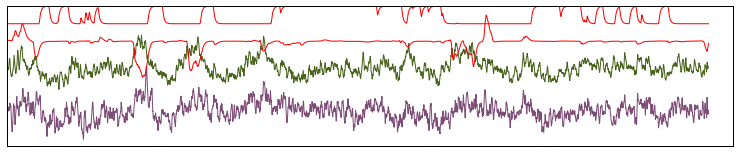

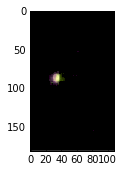

LAL_R
AL_R
GA_R
13
adult antennal lobe


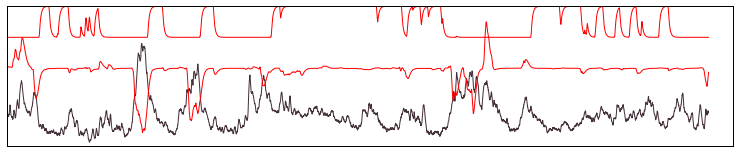

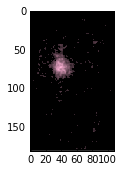

LO_R
LOP_R
ME_R
67
LO_R
LOP_R
ME_R
89
LO_R
LOP_R
ME_R
96
LO_R
LOP_R
ME_R
109
ME_R
120
LO_R
LOP_R
ME_R
143
LO_R
CAN_R
ME_R
148
LO_R
LOP_R
ME_R
152
ME_R
GA_R
159
LO_R
LOP_R
ME_R
160
LOP_R
ME_R
169
LO_R
LOP_R
ME_R
173
LOP_R
ME_R
179
LOP_R
ME_R
193
LO_R
MB_PED_R
LOP_R
ME_R
194
LOP_R
ME_R
201
LO_R
LOP_R
ME_R
221
LOP_R
ME_R
238
LOP_R
ME_R
240
medulla


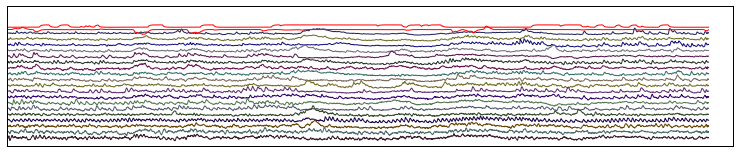

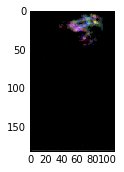

SLP_R
SMP_R
146
SLP_R
SMP_R
241
superior lateral protocerebrum


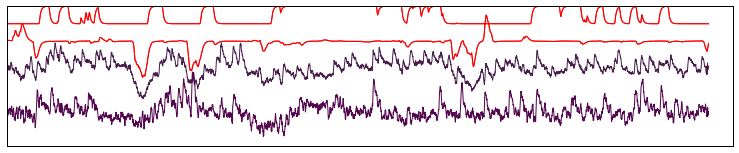

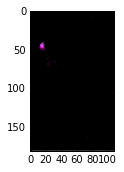

CRE_R
SMP_R
CRE_L
SMP_L
24
SMP_R
182
SMP_R
212
superior medial protocerebrum


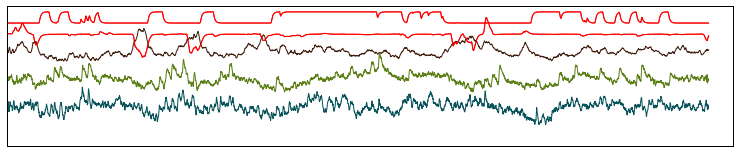

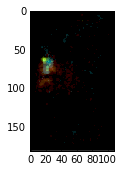

AVLP_R
PVLP_R
AVLP_L
52
anterior ventrolateral protocerebrum


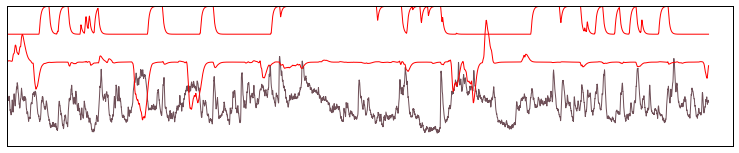

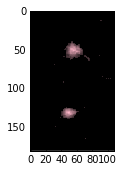

LO_R
AVLP_R
PVLP_R
PLP_R
62
posterior ventrolateral protocerebrum


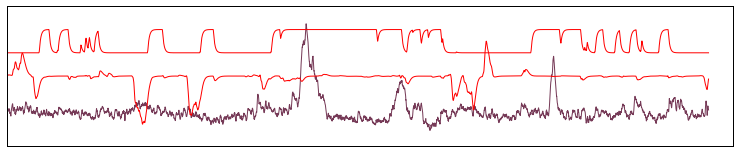

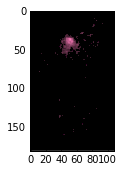

AMMC_R
IVLP_R
23
AMMC_R
IVLP_R
PRW
27
wedge


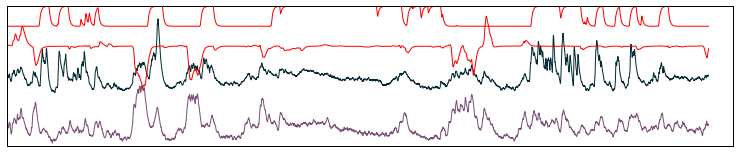

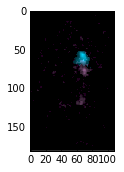

MB_PED_R
MB_VL_R
SIP_R
MB_CA_R
105
MB_PED_R
MB_CA_R
166
MB_CA_R
223
calyx of adult mushroom body


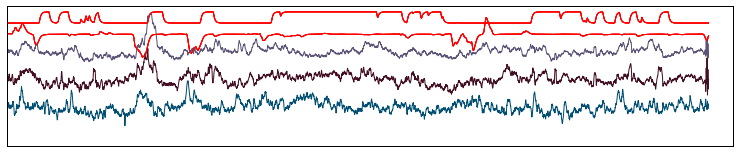

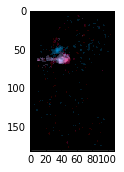

IB_R
SPS_R
25
superior posterior slope


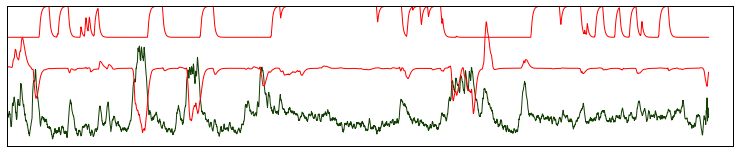

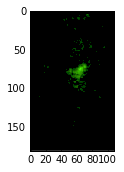

IPS_R
4
LO_R
LOP_R
IPS_R
17
SAD
IPS_R
GNG
18
IPS_R
GNG
28
IPS_R
36
IVLP_R
SPS_R
IPS_R
IPS_L
37
IPS_R
GNG
41
IPS_R
GNG
181
SAD
IPS_R
GNG
242
inferior posterior slope


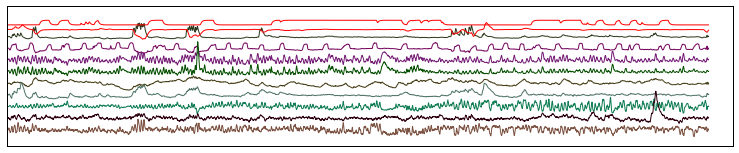

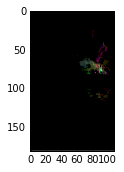

GNG
75
IPS_R
GNG
141
GNG
175
adult gnathal ganglion


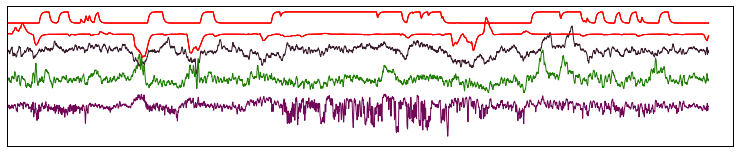

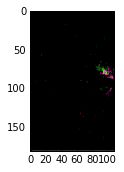

SAD
GNG
PRW
AMMC_L
5
PRW
AMMC_L
FLA_L
7
VES_R
FLA_R
AL_R
PRW
8
CAN_R
IPS_R
GNG
PRW
139
prow


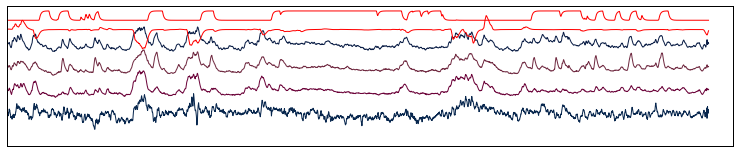

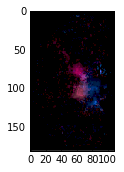

LO_L
LOP_L
10
LO_L
LOP_L
16
LO_L
LOP_L
ME_L
43
LO_L
LOP_L
127
lobula


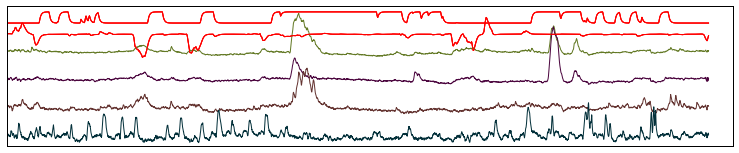

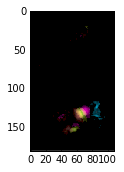

LH_L
107
LH_L
AL_L
138
LH_L
154
lateral horn


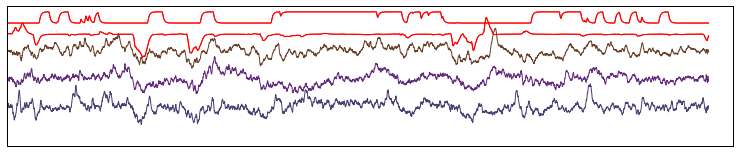

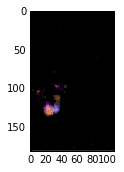

MB_VL_L
SMP_L
172
vertical lobe of adult mushroom body


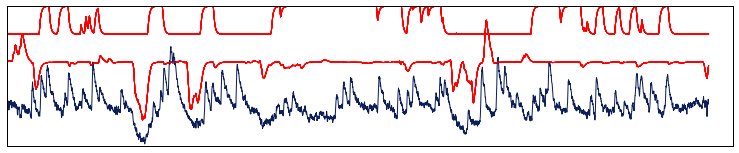

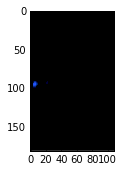

CRE_L
MB_VL_L
MB_ML_L
207
medial lobe of adult mushroom body


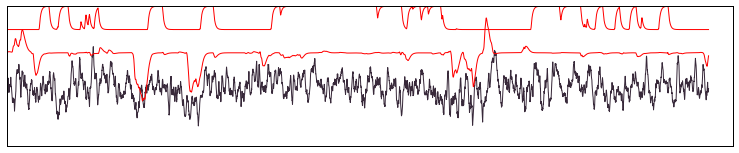

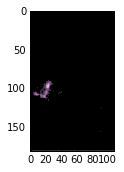

PRW
FLA_L
113
flange


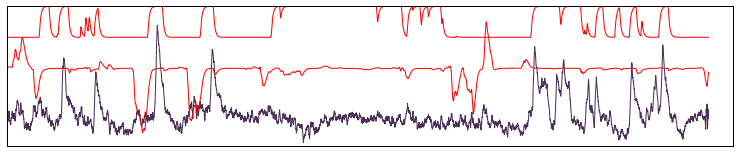

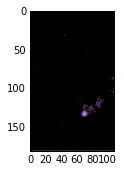

LOP_L
54
MB_CA_R
LOP_L
ME_L
86
LOP_L
ME_L
119
lobula plate


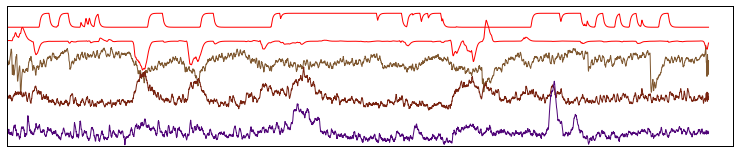

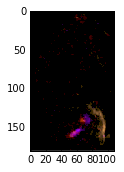

CRE_L
AL_L
103
BU_L
LAL_L
AL_L
116
adult antennal lobe


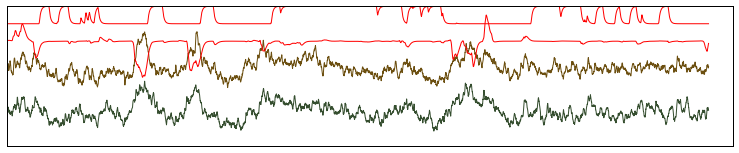

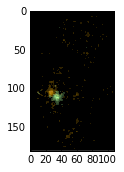

ME_L
12
ME_L
21
ME_L
22
ME_L
29
LOP_L
ME_L
31
ME_L
33
LOP_L
ME_L
48
AMMC_R
LO_L
LOP_L
ME_L
66
LOP_L
ME_L
73
AL_L
ME_L
126
LO_L
ME_L
128
LOP_L
ME_L
135
ATL_R
LOP_L
ME_L
149
LOP_L
ME_L
174
LOP_L
ME_L
176
ME_L
178
ME_L
186
LOP_L
ME_L
187
LO_L
MB_PED_L
LOP_L
ME_L
222
ME_L
224
ME_L
226
LOP_L
ME_L
227
BU_L
LOP_L
ME_L
EPA_L
228
LOP_L
ME_L
231
ME_L
234
LO_L
LOP_L
ME_L
236
ME_L
245
LOP_L
ME_L
248
PB
FLA_R
EPA_R
ME_L
255
LOP_L
ME_L
257
AOTU_R
LOP_L
ME_L
261
AME_L
LOP_L
ME_L
264
PRW
ME_L
GOR_L
271
IB_R
LOP_L
ME_L
289
medulla


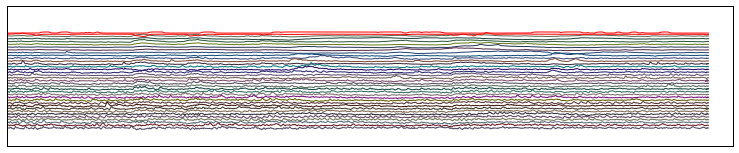

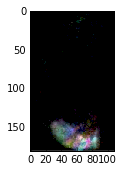

SLP_L
214
SLP_L
215
superior lateral protocerebrum


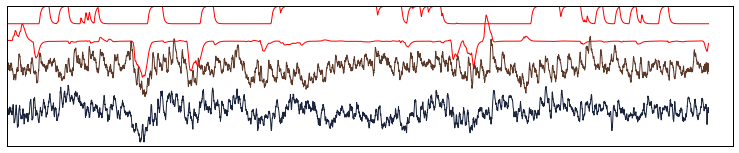

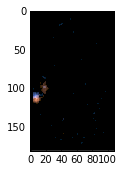

SMP_L
78
SMP_L
150
SMP_L
185
superior medial protocerebrum


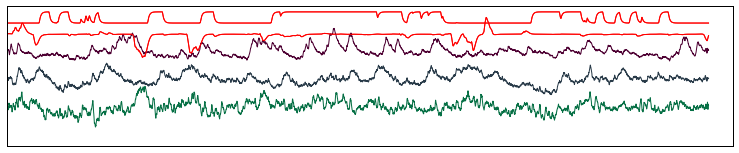

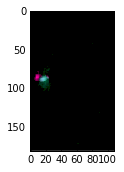

AVLP_L
14
AMMC_L
AVLP_L
PVLP_L
IVLP_L
26
anterior ventrolateral protocerebrum


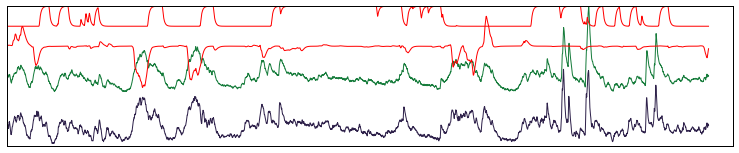

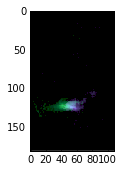

AVLP_L
PVLP_L
191
posterior ventrolateral protocerebrum


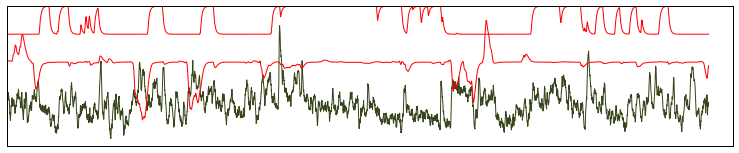

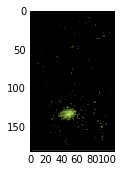

AMMC_L
IVLP_L
39
IVLP_L
PLP_L
IPS_L
286
wedge


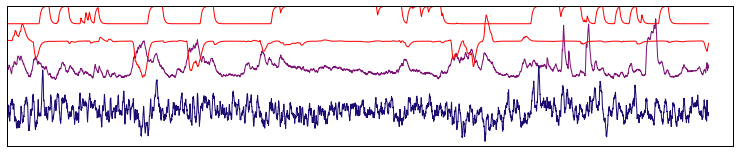

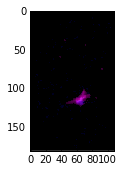

AL_L
MB_CA_L
SCL_L
165
MB_CA_L
192
calyx of adult mushroom body


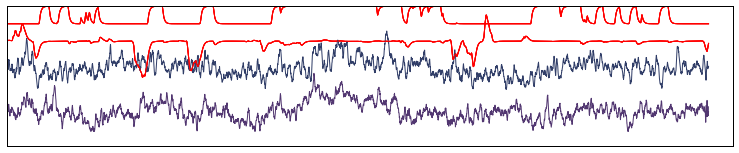

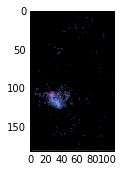

IB_R
IB_L
SPS_L
1
SMP_R
CAN_L
SPS_L
IPS_L
51
superior posterior slope


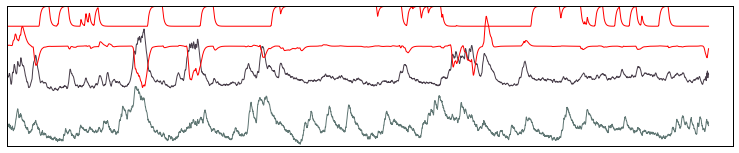

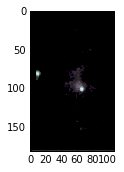

IVLP_L
SPS_L
IPS_L
6
GNG
IPS_L
20
IPS_L
32
GNG
IPS_L
97
inferior posterior slope


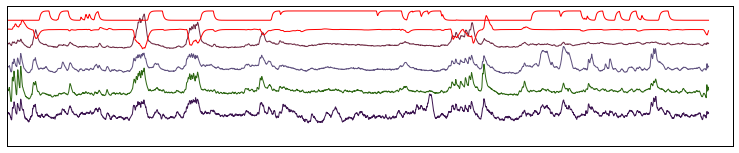

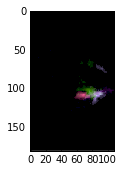

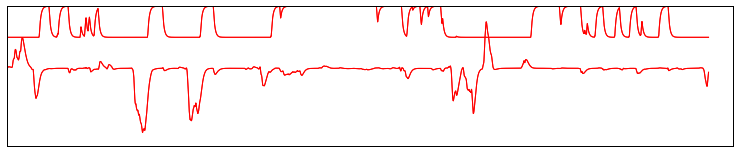

In [40]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
GoodICAnat=np.zeros(S[3])

for l in range(74):
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if CompMainName[i]==Names[l][0] and (sum(CompNameAdd[i,:])<5) and nrobject<200:
            n=n+1            
            
            for k in range(3):
                Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
            Final_maps=Final_maps+Fmap
            plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)        
            tot=tot+1
            GoodICAnat[i]=1
            #print(i)
            for j in range(86):
                if CompNameAdd[i,j]==1:                
                    print(Names[np.array(j)][0])
            print(i)
            
    plt.plot(Time_fluoICA.T,3*(Xk[:,0]-Xk[:,1])/np.max(Xk[:,0]-Xk[:,1]),color=(1,0,0))   
    plt.plot(Time_fluoICA.T,2*Xk[:,4]/np.max(Xk[:,4])+2,color=(1,0,0))
    #plt.plot(Time_fluoICA.T,2*Xk[:,2]/np.max(Xk[:,2])+1.5,color=(1,0,1))    
    if n!=0:
        print(Names[l][1])

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        
# Open template

In [41]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenamet = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenamet)
nimt=nb.load(filenamet)
Dtemp=np.squeeze(nimt.get_data())
Dtemp.shape

/media/sophie2/100148/100148ss2it30/AVG_100148ss2onc500regcpsf.nii


(181, 109, 9)

# Reorder by larger sub-regions (~ presumed stimulus to motor)

In [57]:
LargerRegionsDic={'':'','AME_R':'OL','LO_R':'OL','NO':'CX','BU_R':'CX','PB':'CX','LH_R':'LH','LAL_R':'LX','SAD':'PENP'
               ,'CAN_R':'PENP','AMMC_R':'PENP','ICL_R':'INP','VES_R':'VMNP','IB_R':'INP','ATL_R':'INP','CRE_R':'INP'
               ,'MB_PED_R':'MB','MB_VL_R':'MB','MB_ML_R':'MB','FLA_R':'PENP','LOP_R':'OL','EB':'CX','AL_R':'AL',
                'ME_R':'OL','FB':'CX','SLP_R':'SNP','SIP_R':'SNP','SMP_R':'SNP','AVLP_R':'VLNP','PVLP_R':'VLNP',
                'IVLP_R':'VLNP','PLP_R':'VLNP','AOTU_R':'VLNP','GOR_R':'VMNP','MB_CA_R':'MB','SPS_R':'VMNP',
                'IPS_R':'VMNP','SCL_R':'INP','EPA_R':'VMNP','GNG':'GNG','PRW':'PENP','GA_R':'LX','AME_L':'OL'
                ,'LO_L':'OL','BU_L':'CX','LH_L':'LH','LAL_L':'LX','CAN_L':'PENP','AMMC_L':'PENP','ICL_L':'INP',
                'VES_L':'VMNP','IB_L':'INP','ATL_L':'INP','CRE_L':'INP','MB_PED_L':'MB','MB_VL_L':'MB',
                'MB_ML_L':'MB','FLA_L':'PENP','LOP_L':'OL','AL_L':'AL','ME_L':'OL','SLP_L':'SNP','SIP_L':'SNP',
                'SMP_L':'SNP','AVLP_L':'VLNP','PVLP_L':'VLNP','IVLP_L':'VLNP','PLP_L':'VLNP','AOTU_L':'VLNP',
                'GOR_L':'VMNP','MB_CA_L':'MB','SPS_L':'VMNP','IPS_L':'VMNP','SCL_L':'INP','EPA_L':'VMNP','GA_L':'LX'}

In [58]:
SmallRegionsSorted=['ME_L','ME_R','LO_R','LO_L','LOP_R','LOP_L','AME_R','AME_L',
                  'PLP_R','PLP_L','PVLP_R','PVLP_L','AVLP_R','AVLP_L','AOTU_R','AOTU_L','IVLP_R','IVLP_L',
                  'AL_R','AL_L',
                  'MB_CA_R','MB_CA_L','MB_PED_R','MB_PED_L','MB_VL_R','MB_VL_L','MB_ML_R','MB_ML_L',
                  'SMP_R','SMP_L','SIP_R','SLP_L','SLP_R','SIP_L',
                  'LH_R','LH_L',                  
                  'CRE_R','CRE_L','ICL_R','ICL_L','SCL_R','SCL_L','IB_R','IB_L','ATL_R','ATL_L',
                  'EB','PB','NO','FB',
                  'BU_R','BU_L','LAL_R','LAL_L','GA_R','GA_L',
                  'GOR_R','GOR_L','EPA_R','EPA_L','VES_R','VES_L','SPS_R','SPS_L','IPS_R','IPS_L',
                  'AMMC_R','AMMC_L','SAD','FLA_R','FLA_L','PRW','CAN_R','CAN_L',
                  'GNG','']

In [59]:
Tozip=range(len(SmallRegionsSorted))
SmallRegionsDic=dict(zip(SmallRegionsSorted,Tozip))

In [60]:
LargerRegion=[LargerRegionsDic[CompMainName[i]] for i in range(S[3])]

In [61]:
LargerRegionInd={ 'OL':1,'VLNP':2,'VMNP':3,'AL':4,'MB':5,'LH':6,'SNP':7,'CX':8,'LX':9,'INP':10,'PENP':11,'GNG':12,'':13}

In [62]:
LargerRegionI=np.array([LargerRegionInd[LargerRegion[i]] for i in range(S[3])])

In [63]:
SmallRegion=np.array([SmallRegionsDic[CompMainName[i]] for i in range(S[3])])

In [64]:
NewOrder=np.argsort(SmallRegion)

In [65]:
SmallRegion[NewOrder]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  7,  7,  7, 10, 11, 12, 12,
       12, 13, 13, 14, 16, 16, 16, 17, 17, 17, 17, 18, 18, 19, 19, 19, 19,
       19, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 22, 23, 23, 24, 24,
       25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 28, 28, 28, 28, 28, 29, 29,
       29, 29, 29, 30, 31, 31, 32, 32, 34, 34, 35, 35, 35, 44, 44, 45, 45,
       45, 45, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 48, 48,
       48, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51, 53, 54, 54, 54, 54, 54,
       54, 55, 55, 55, 55

# Last pruning by hand

In [66]:
%%javascript
IPython.OutputArea.auto_scroll_threshold =4000;

<IPython.core.display.Javascript object>

In [67]:
if S[2]>5:
    Nstack=5
    Int100=[(i+1)*100/Nstack for i in range(Nstack)]
    Percs=np.percentile(range(S[2]),Int100)
    Indices=np.split(range(S[2]),Percs)
    D1=np.zeros([S[0],S[1],Nstack])
    Dmean=np.squeeze(data[:,:,range(Nstack),2])
    for i in range(Nstack):
        Vmean=np.mean(Dtemp[:,:,Indices[i]],2)
        Dmean[:,:,i]=Vmean
else:
    Nstack=S[2]
    D1=np.zeros([S[0],S[1],S[2]])
    Dmean=data[:,:,range(S[2])]  
    Dmean=np.squeeze(Dtemp[:,:,:])

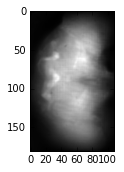

In [68]:
plt.imshow(Dmean[:,:,1],cmap=plt.cm.gray)

In [69]:
my_cmap=plt.cm.jet
my_cmap.set_bad(alpha=0)
Good_ICs=np.zeros(S[3])
Label_ICs=[]
pylab.rcParams['figure.figsize'] = (15, 2.5)

0
PB


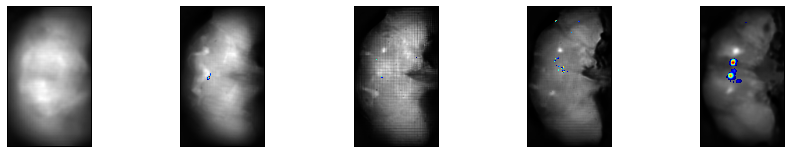

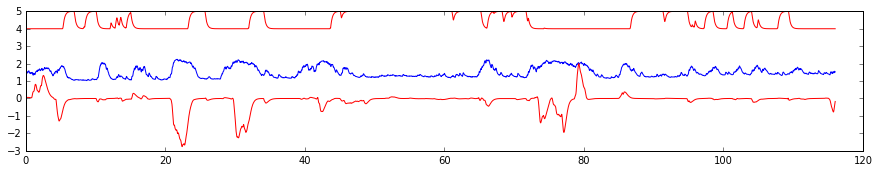

a
1
SPS_L


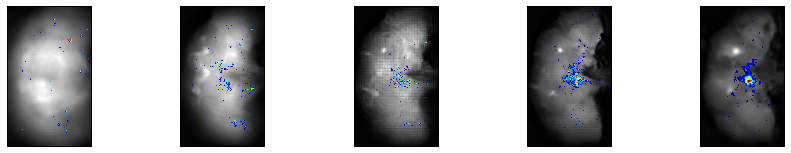

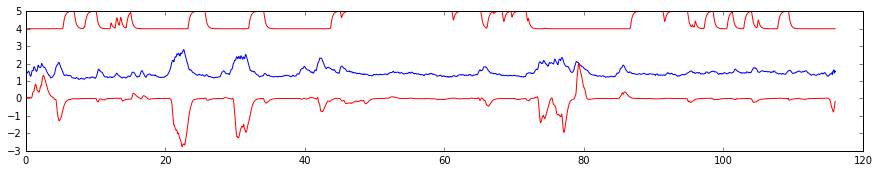

a
2
PB


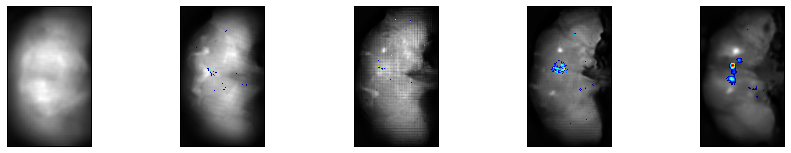

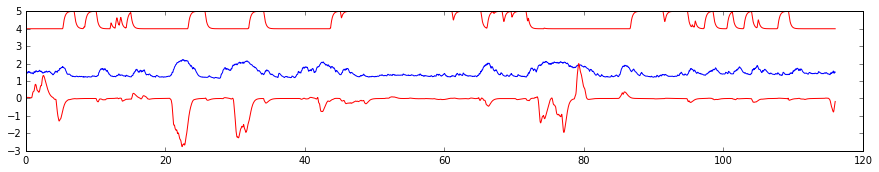

a
3
SAD


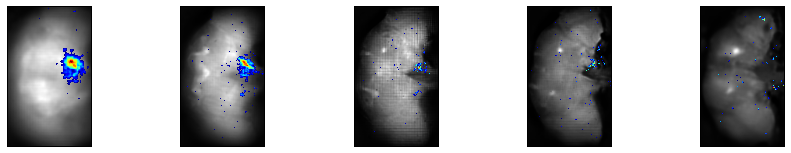

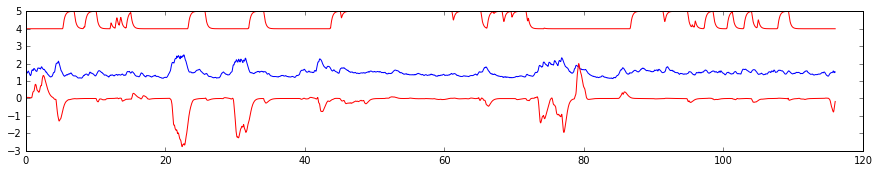

a
4
IPS_R


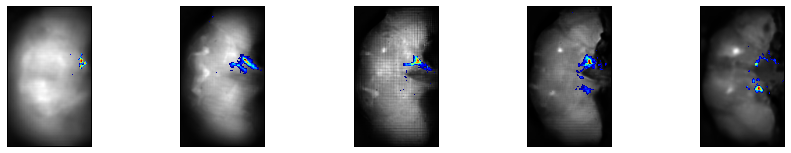

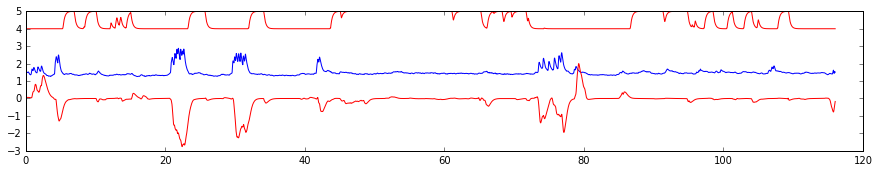

a
5
PRW


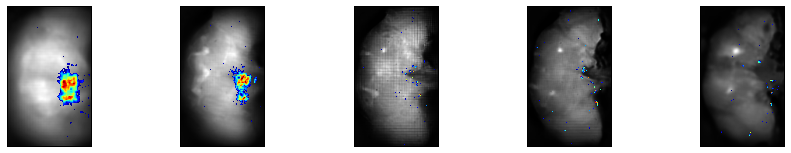

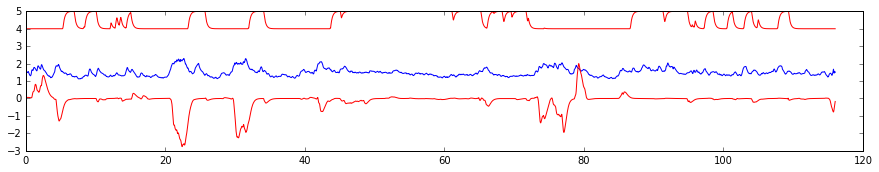

a
6
IPS_L


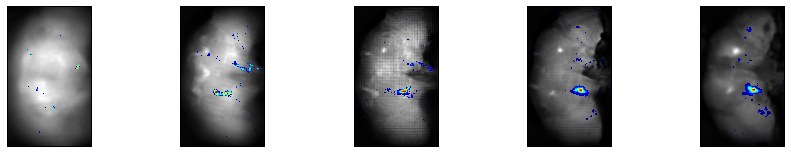

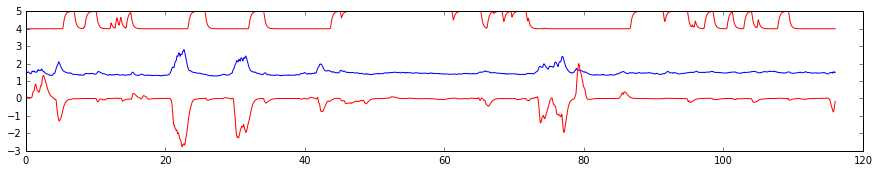

a
7
PRW


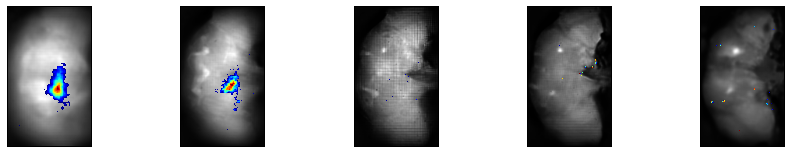

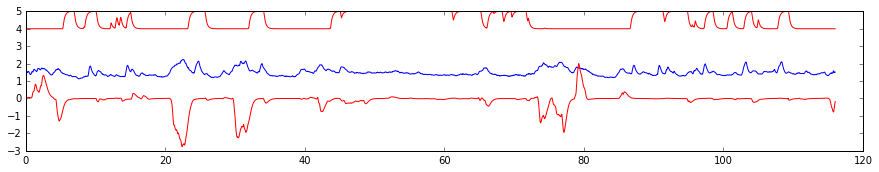

a
8
PRW


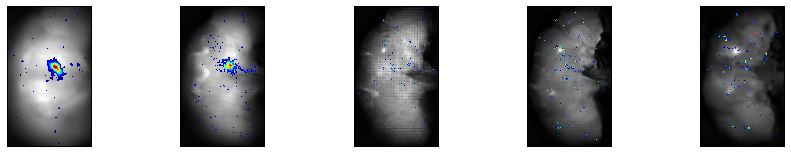

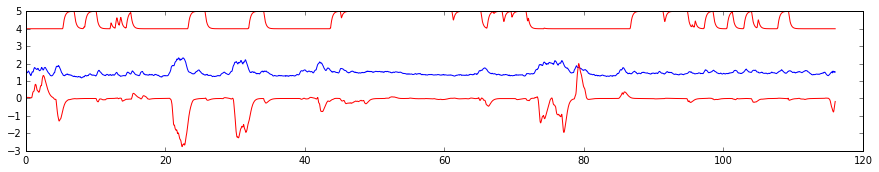

a
9
PB


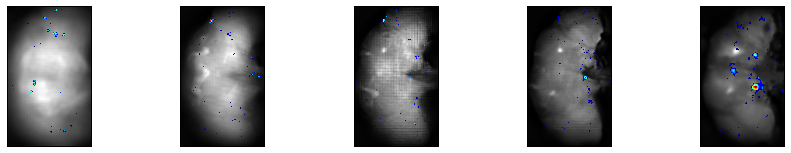

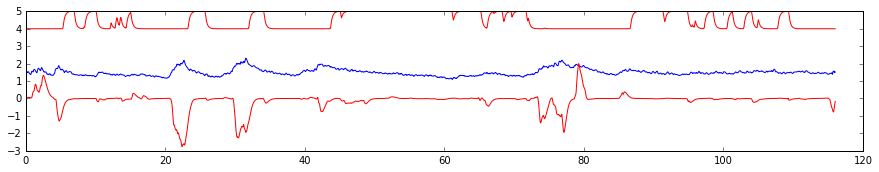

a
11
PB


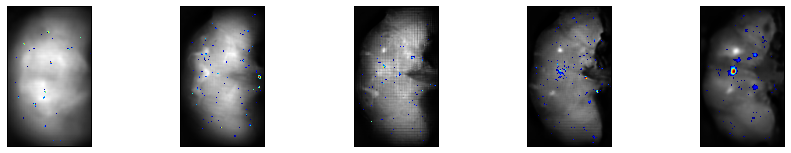

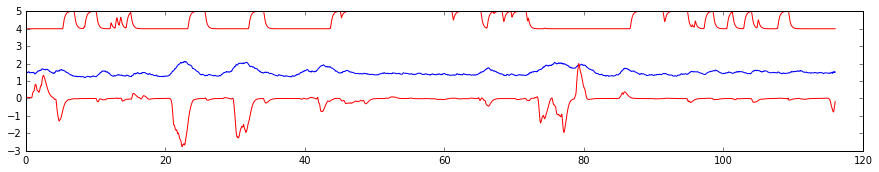

a
13
AL_R


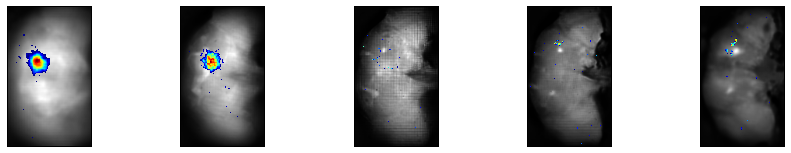

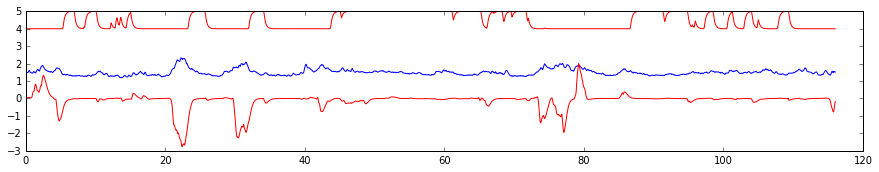

a
14
AVLP_L


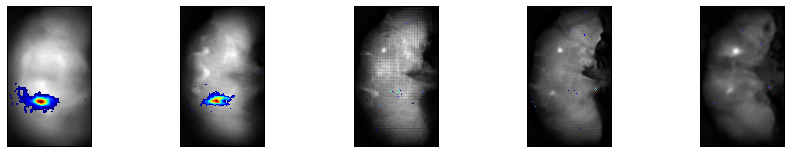

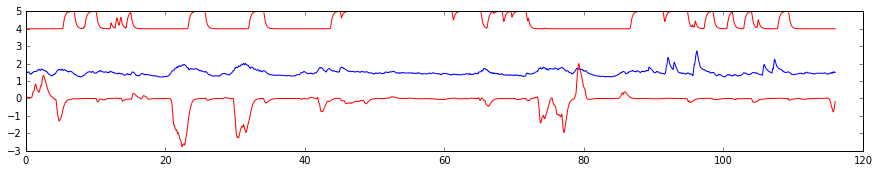

a
15
AL_L


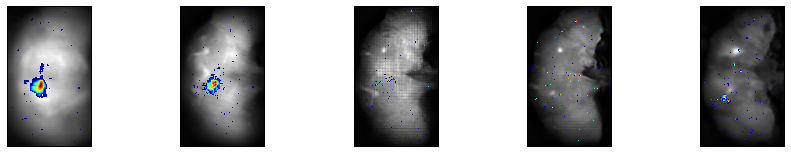

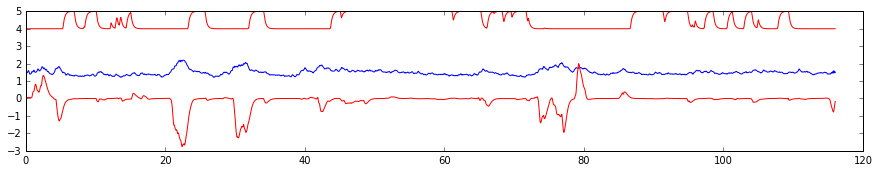

a
17
IPS_R


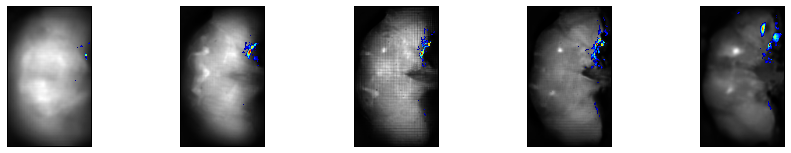

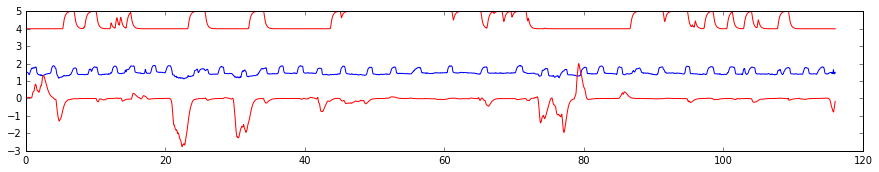


18
IPS_R


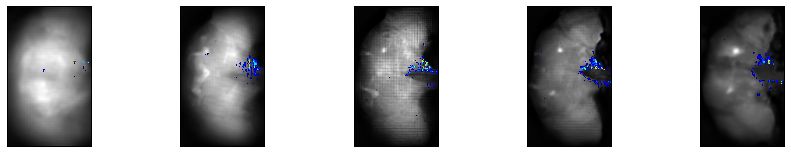

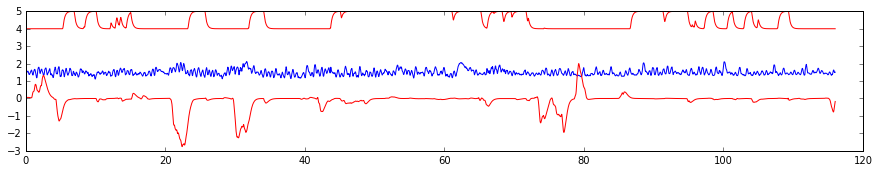


20
IPS_L


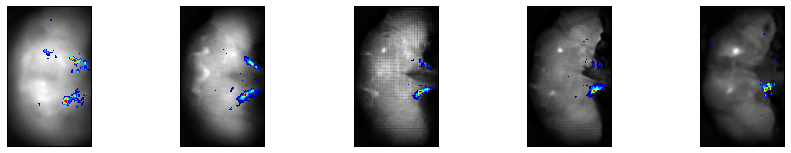

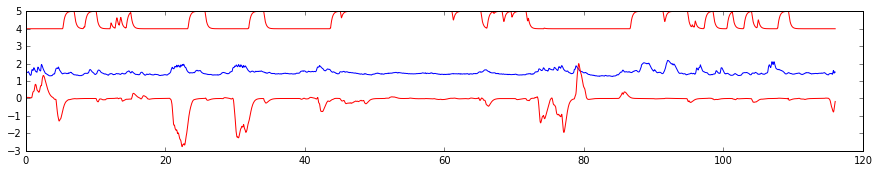

a
23
IVLP_R


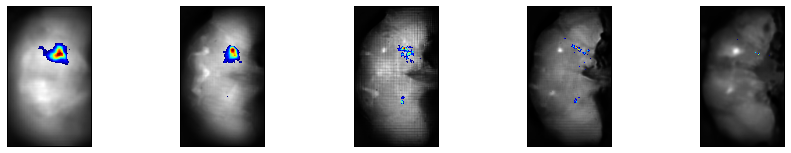

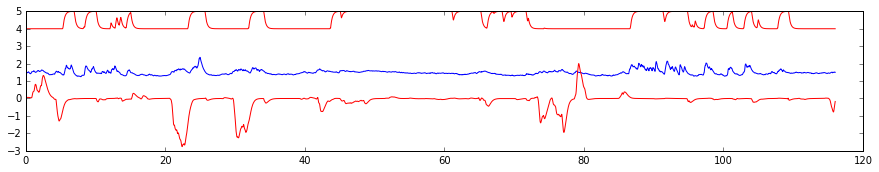

a
24
SMP_R


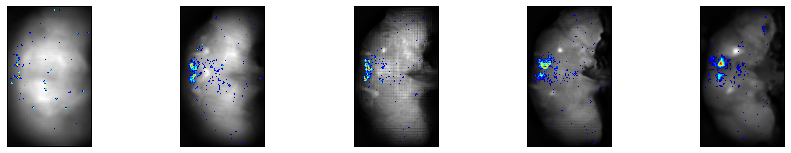

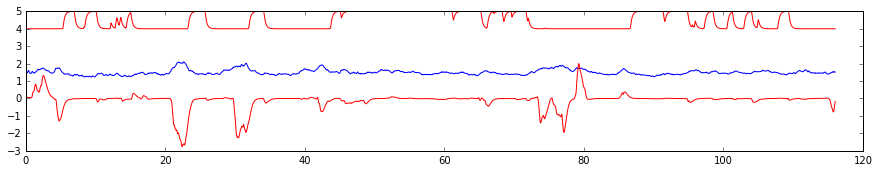

s
25
SPS_R


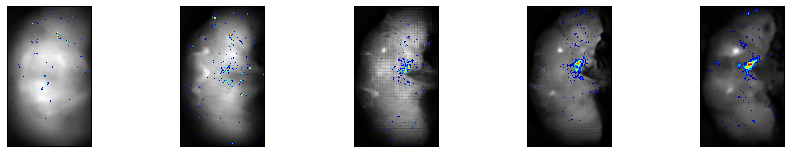

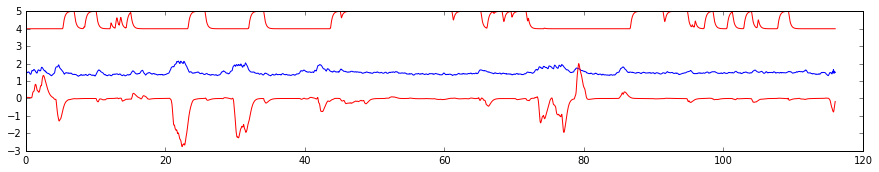

s
26
AVLP_L


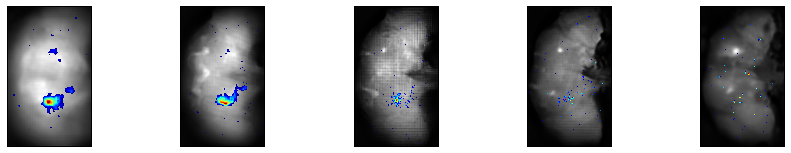

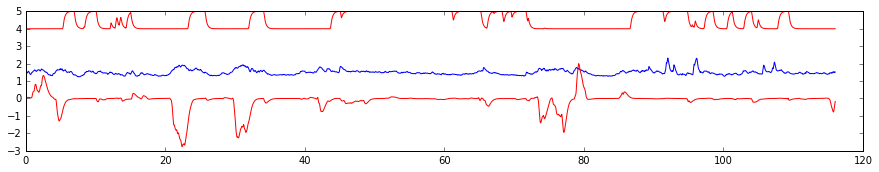

s
27
IVLP_R


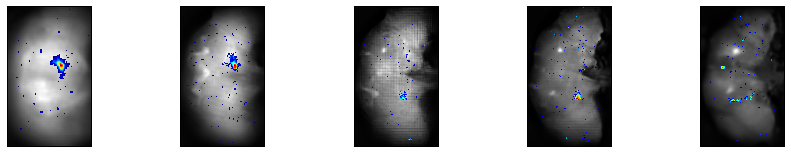

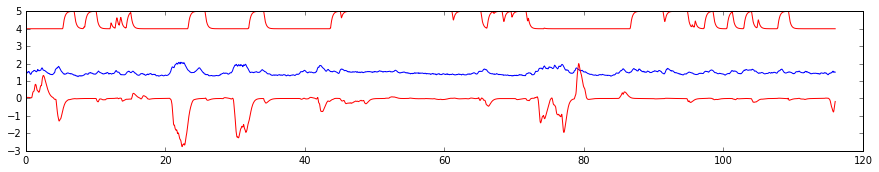

s
28
IPS_R


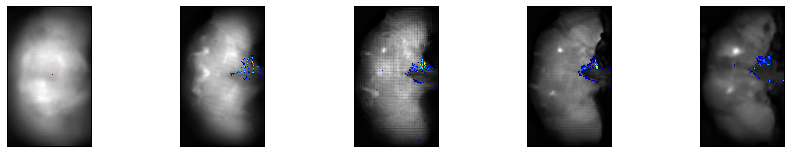

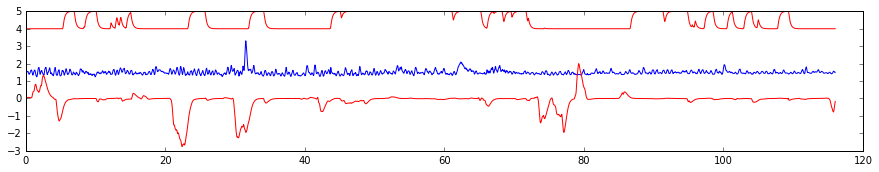


30
GNG


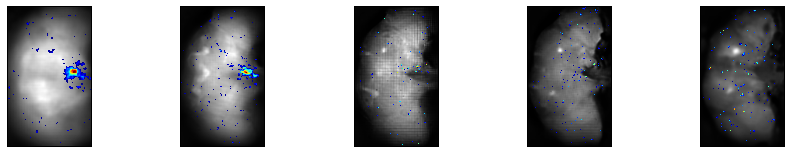

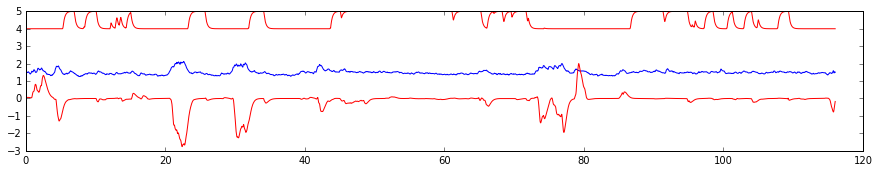

s
32
IPS_L


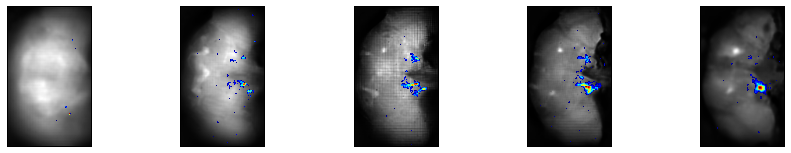

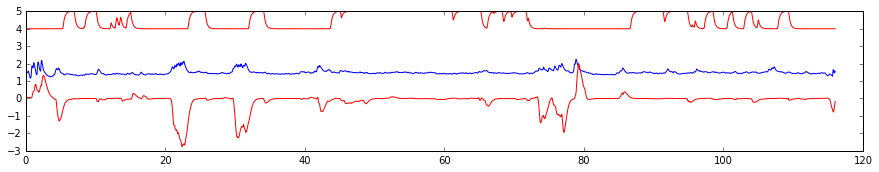

s
35
EB


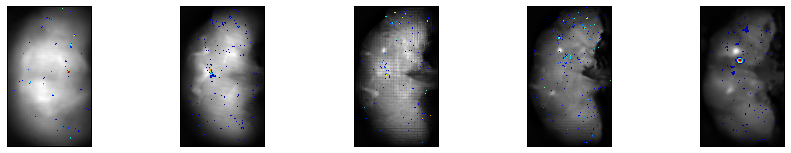

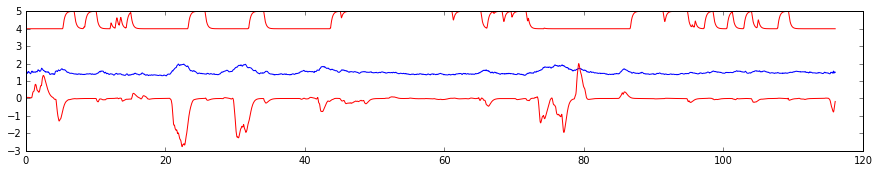

s
36
IPS_R


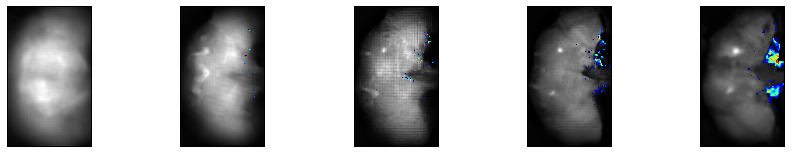

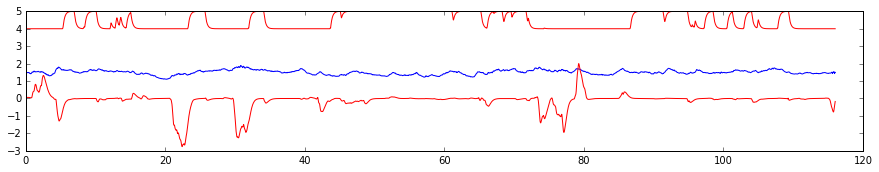

KeyboardInterrupt: 

In [76]:
for j in range(S[3]):

    a=''
    if S[2]>5:
        for i in range(Nstack):
            V=Dmaps[:,:,Indices[i],j]
            D1[:,:,i]=np.max(V,2)
        D2[:,:,:,j]=D1
        D1[D1==0]=np.nan
           
    else:
        for i in range(S[2]):
            V=Dmaps[:,:,i,Order[j]]
            D1[:,:,i]=V 

    if (CompMainName[j] != '') and (LargerRegionI[j]!=1):
        print(j)
        print(CompMainName[j])
        for i in range(Nstack):
            plt.subplot(1,5,i+1)
            plt.imshow(Dmean[:,:,i],cmap=plt.cm.gray)
            plt.imshow(D1[:,:,i], cmap=my_cmap,interpolation='none')
            frame1 = plt.gca()
            frame1.axes.get_xaxis().set_visible(False)
            frame1.axes.get_yaxis().set_visible(False)
        
        plt.show()
        
        plt.plot(Time_fluoICA.T,DT[:,j]+1.5)
        plt.plot(Time_fluoICA.T,2*(Xk[:,0]-Xk[:,1])/np.max(Xk[:,0]-Xk[:,1]),color=(1,0,0))   
        plt.plot(Time_fluoICA.T,Xk[:,4]/np.max(Xk[:,4])+4,color=(1,0,0))
        plt.show()
        a=raw_input()
    
    Label_ICs.append(a)
    if Label_ICs[j]!='':
        Good_ICs[j]=1

In [101]:
Dmaps.shape

(181, 109, 9, 300)

In [104]:
fn=open('/home/sophie/Desktop/100148GoodICs150.txt','w')
for i in range(S[3]):
    if Good_ICs[i]:
        print>>fn, i
        print>>fn, CompMainName[i]
        print>>fn, Good_ICs[i]

In [105]:
if len(Label_ICs)<S[3]:
    for j in range(S[3]-len(Label_ICs)):
      Label_ICs.append('')  

In [106]:
G=Good_ICs.tolist();

In [107]:
len(Good_ICs)

300

In [108]:
G.count(1)

58

# Plot all components together

In [118]:
if S[2]>5:
    Final_map=np.zeros([S[0],S[1],5,3])
    Fmaps=np.zeros([S[0],S[1],5,3])
else:
    Final_map=np.zeros([S[0],S[1],3]) 
    Fmaps=np.zeros([S[0],S[1],3])    
C=np.zeros([S[3],3])

In [119]:
C1=np.zeros([6,3])
C1[0][:]=(1,0,0)
C1[1][:]=(0,1,0)
C1[2][:]=(0,0,1)
C1[3][:]=(0.8,0.8,0)
C1[4][:]=(0,1,1)
C1[5][:]=(1,0,1)
S1=DT.shape

In [120]:
GoodICo=Good_ICs[NewOrder]
D2o=D2[:,:,:,NewOrder]
LargerRegionIo=LargerRegionI[NewOrder]
Ind=np.array(range(S[3]))
Indexo=Ind[NewOrder]
DTo=DT[:,NewOrder]

In [121]:
C=np.zeros((S[3],3))
i=0
for j in range(S[3]):  
    if LargerRegionIo[j]<12 and GoodICo[j]:
        C[j,:]=C1[i%6][:]
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2o[:,:,:,j],S[0]*S[1]*5)))
            Fmaps[:,:,:,k]=0.6*D2o[:,:,:,j]*C[j,k]/M
        Final_map=Final_map+Fmaps
        #print(Indexo[j])
        i=i+1

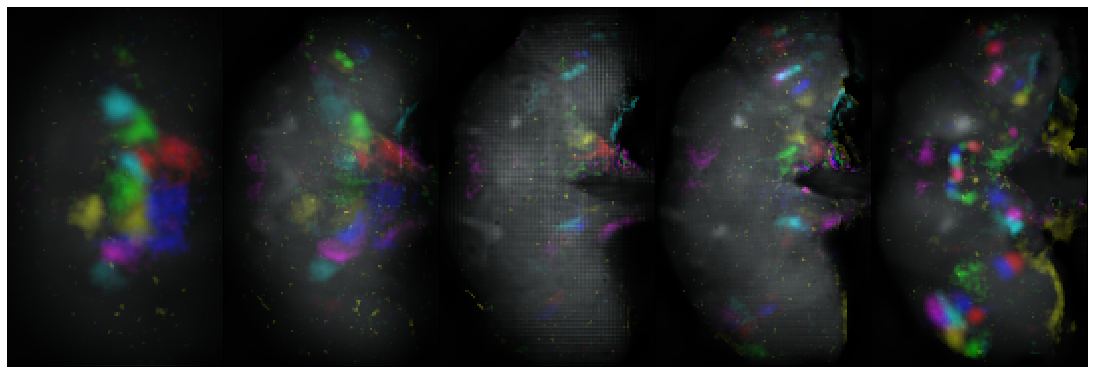

In [122]:
pylab.rcParams['figure.figsize'] = (15, 6)
C2=np.zeros(3)

Df=np.zeros([S[0],S[1],5,3]) 
  
for i in range(3):
    Df[:,:,:,i]=Final_map[:,:,:,i]+Dmean/16
    Df=Df/(np.max(np.max(Df)))
if S[2]>5:
    N=Nstack
else:
    N=S[2]
for i in range(N):
    #if Good_ICs[j]:
        plt.subplot(1,N,i+1)
        plt.imshow(Dmean[:,:,i],cmap=plt.cm.gray)
        plt.imshow(Df[:,:,i,:],cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
plt.tight_layout(pad=0,w_pad=0,h_pad=0)

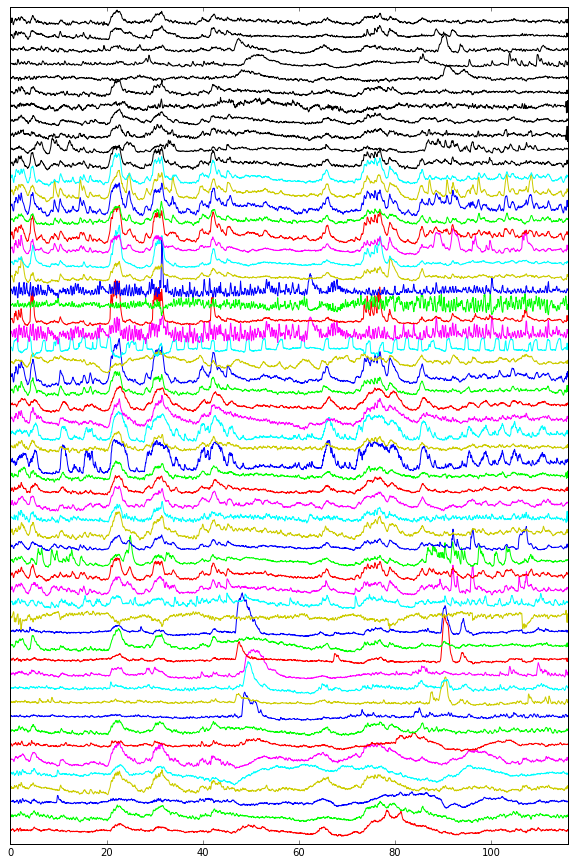

In [123]:
pylab.rcParams['figure.figsize'] = (10, 15)
h=0.5
i=0

for j in range(S[3]):
    if GoodICo[j]:
        plt.plot(Time_fluoICA,(DTo[:,j]+h*i),color=C[j,:]) 
        i=i+1
plt.xlim([np.min(Time_fluoICA),np.max(Time_fluoICA)])
plt.ylim([-0.5,h*i])
frame1 = plt.gca()
frame1.axes.get_yaxis().set_visible(False)
plt.show()

In [124]:
k=0
J=np.zeros(len(GoodICo[GoodICo==1]))
for j in range(len(GoodICo)):
    if GoodICo[j]:
        print(k)
        print([CompMainName[Indexo[j]]])
        J[k]=j
        k=k+1

0
['ME_L']
1
['ME_L']
2
['ME_L']
3
['ME_L']
4
['ME_L']
5
['ME_L']
6
['ME_R']
7
['ME_R']
8
['LO_R']
9
['LO_R']
10
['LO_R']
11
['LO_R']
12
['LO_L']
13
['LO_L']
14
['LO_L']
15
['LOP_L']
16
['AVLP_R']
17
['AVLP_L']
18
['IVLP_R']
19
['IVLP_R']
20
['IVLP_L']
21
['AL_L']
22
['MB_VL_R']
23
['SMP_R']
24
['EB']
25
['PB']
26
['PB']
27
['PB']
28
['PB']
29
['PB']
30
['PB']
31
['SPS_R']
32
['SPS_L']
33
['IPS_R']
34
['IPS_R']
35
['IPS_R']
36
['IPS_R']
37
['IPS_R']
38
['IPS_R']
39
['IPS_R']
40
['IPS_L']
41
['IPS_L']
42
['SAD']
43
['FLA_L']
44
['PRW']
45
['PRW']
46
['PRW']
47
['GNG']
48
['']
49
['']
50
['']
51
['']
52
['']
53
['']
54
['']
55
['']
56
['']
57
['']


In [125]:
Sets=[range(10),range(10,12),range(12,17),range(17,20),20,range(21,23),range(23,25),25]

In [126]:
pylab.rcParams['figure.figsize'] = (12, 6)

for i in range(len(Sets)):
    
    Final_map2=np.zeros([S[0],S[1],3]) 
    Fmaps2=np.zeros([S[0],S[1],3]) 
    Final_map3=np.zeros([S[0],S[1],5,3]) 
    Fmaps3=np.zeros([S[0],S[1],5,3])     
     
    if type(Sets[i])==list:
        for j in np.array(Sets[i]):
            C=np.zeros((S[3],3))
            C[j,:]=C1[j%6][:]
            
            for k in range(3):           
                M=np.max(np.squeeze(np.reshape(D2o[:,:,:,J[j]],S[0]*S[1]*5)))
                Fmaps2[:,:,k]=0.9*np.mean(D2o[:,:,:,J[j]],2)*C[j,k]/M
                M=np.max(np.squeeze(np.reshape(D2o[:,:,:,J[j]],S[0]*S[1],5)))
                Fmaps3[:,:,:,k]=0.9*D2o[:,:,:,J[j]]*C[j,k]/M                
            Final_map2=Final_map2+Fmaps2
            Final_map3=Final_map3+Fmaps3            
                
    else:
        j=Sets[i]
        C[j,:]=C1[j%6][:]
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2o[:,:,:,J[j]],S[0]*S[1]*5)))
            Fmaps2[:,:,k]=0.8*np.mean(D2o[:,:,:,J[j]],2)*C[j,k]/M
        Final_map2=Final_map2+Fmaps2
                
    Df=np.zeros([S[0],S[1],3]) 
  
    for l in range(3):
        Df[:,:,l]=Final_map2[:,:,l]+np.mean(Dmean,2)/16
    MM=np.max(np.max(Df))

    Rotated=ndimage.rotate(Df[:,:,:]/MM,-90)
    a=plt.imshow(Rotated,cmap=my_cmap,interpolation='none')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

    plt.show()
                                

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


ValueError: total size of new array must be unchanged